In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.decomposition import PCA

# Gap Stats Helper Function

In [127]:
def gap_statistic(X,refs=None, n_refs=10, max_k = 10):

  shape = X.shape

  if refs is None:
    tops = X.max(axis=0)
    bots = X.min(axis=0)
    dists = np.diag(tops-bots)
    rands = np.random.random_sample(size=(n_refs,shape[0],shape[1]))
    refs = rands @ dists + bots

  gaps = np.zeros(max_k)
  for k in range(1,max_k + 1):
    km = KMeans(n_clusters=k,n_init = 10,random_state=42)
    km.fit(X)
    disp = km.inertia_
    ref_disps = np.zeros(n_refs)
    for i in range(n_refs):
      km.fit(refs[i])
      ref_disps[i] = km.inertia_
    gaps[k-1] = np.log(np.mean(ref_disps)) - np.log(disp)
  return gaps

# Generating Two Datasets

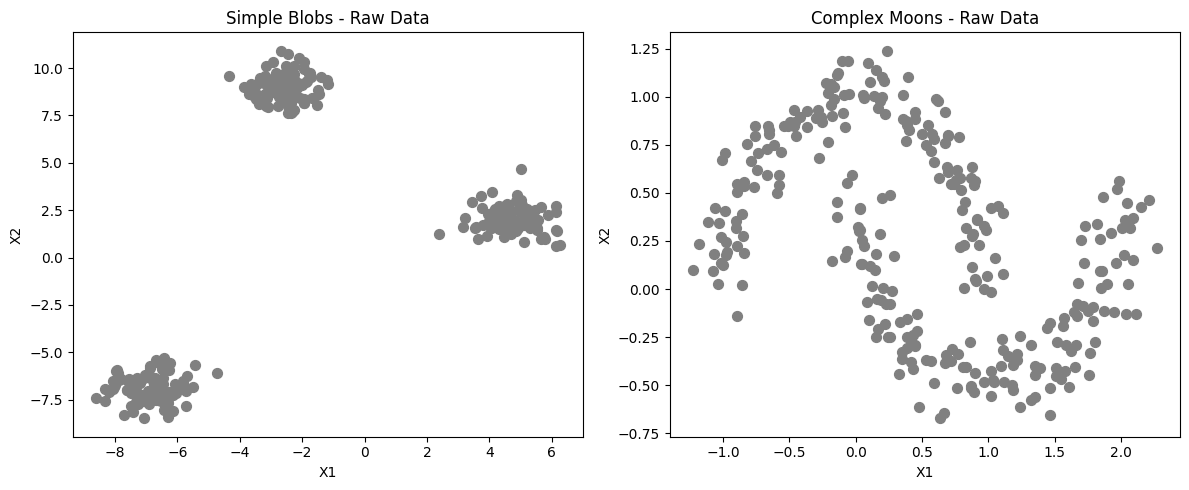

In [128]:
#Generate Datasets
X_simple, y_simple = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)
X_complex, y_complex = make_moons(n_samples=300, noise=0.1, random_state=42)

datasets= {
    "Simple Blobs":X_simple,
    "Complex Moons":X_complex
}

plt.figure(figsize=(12,5))

# Simple Blobs
plt.subplot(1,2,1)
plt.scatter(X_simple[:,0], X_simple[:,1], c='gray', s=50)
plt.title("Simple Blobs - Raw Data")
plt.xlabel("X1")
plt.ylabel("X2")

# Complex Moons
plt.subplot(1,2,2)
plt.scatter(X_complex[:,0], X_complex[:,1], c='gray', s=50)
plt.title("Complex Moons - Raw Data")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()

# Simple Blobs

In [129]:
max_k = 6

wcss_simple = []
silhouette_simple = []

for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_simple)
    wcss_simple.append(kmeans.inertia_)
    silhouette_simple.append(silhouette_score(X_simple, labels))

# Gap Statistic
gaps_simple = gap_statistic(X_simple, n_refs=5, max_k=max_k)


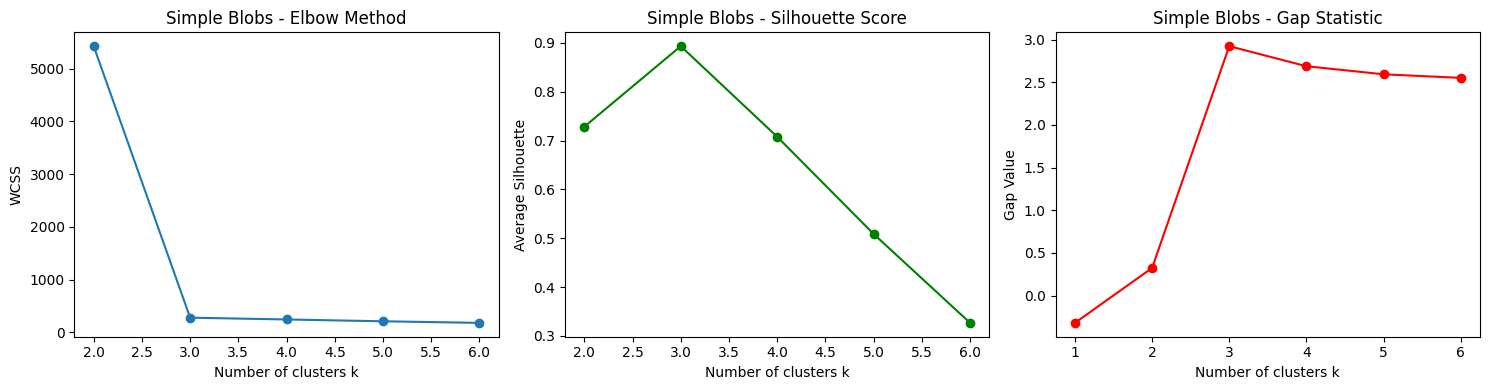

In [130]:
# Plotting for Simple Blobs
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(range(2, max_k+1), wcss_simple, marker='o')
plt.title("Simple Blobs - Elbow Method")
plt.xlabel("Number of clusters k")
plt.ylabel("WCSS")

plt.subplot(1,3,2)
plt.plot(range(2, max_k+1), silhouette_simple, marker='o', color='green')
plt.title("Simple Blobs - Silhouette Score")
plt.xlabel("Number of clusters k")
plt.ylabel("Average Silhouette")

plt.subplot(1,3,3)
plt.plot(range(1, max_k+1), gaps_simple, marker='o', color='red')
plt.title("Simple Blobs - Gap Statistic")
plt.xlabel("Number of clusters k")
plt.ylabel("Gap Value")

plt.tight_layout()
plt.show()

According to all three methods it shows that $k=3$ is the most optimal for clustering.
- Elbow at 3
- Silhouette Score Highest at 3
- Gap stats show noticable peak at 3
****

# Complex Moons

In [131]:
wcss_complex = []
silhouette_complex = []

for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_complex)
    wcss_complex.append(kmeans.inertia_)
    silhouette_complex.append(silhouette_score(X_complex, labels))

# Gap Statistic
gaps_complex = gap_statistic(X_complex, n_refs=5, max_k=max_k)

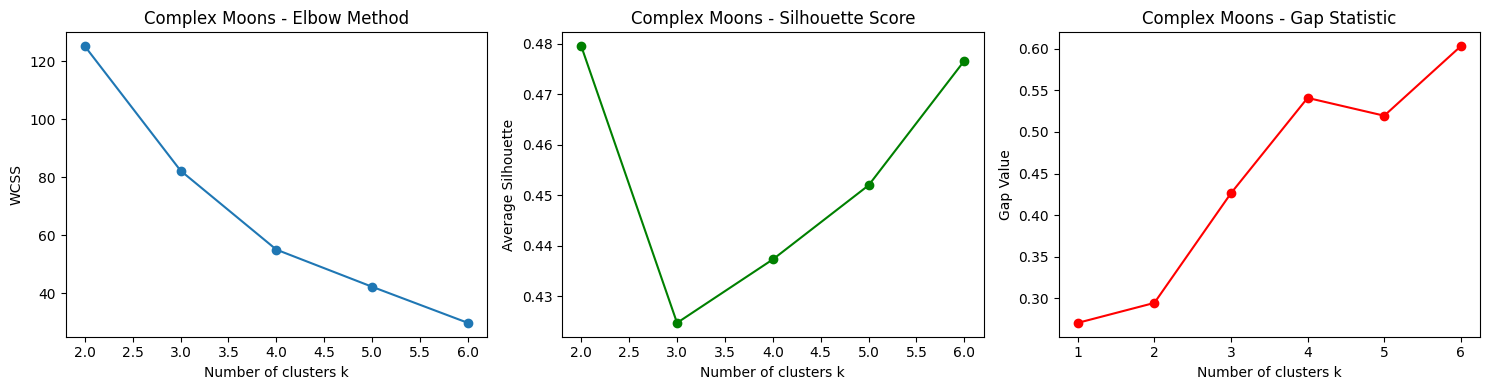

In [132]:
# Plotting for Complex Moons
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(range(2, max_k+1), wcss_complex, marker='o')
plt.title("Complex Moons - Elbow Method")
plt.xlabel("Number of clusters k")
plt.ylabel("WCSS")

plt.subplot(1,3,2)
plt.plot(range(2, max_k+1), silhouette_complex, marker='o', color='green')
plt.title("Complex Moons - Silhouette Score")
plt.xlabel("Number of clusters k")
plt.ylabel("Average Silhouette")

plt.subplot(1,3,3)
plt.plot(range(1, max_k+1), gaps_complex, marker='o', color='red')
plt.title("Complex Moons - Gap Statistic")
plt.xlabel("Number of clusters k")
plt.ylabel("Gap Value")

plt.tight_layout()
plt.show()

Interestingly all three methods show that $k$ is good at different values for clustering.
- Elbow eyeballs to about 3
- Surprisingly Silhouette Score has its Lowest at 3 and recommends $k$ at 2 or 6
- Gap stats shows noticable peak at 4 and 6
****

# Clusters Simple Blobs

In [133]:
# Function to plot clusters with centroids
def plot_kmeans_clusters(X, k, dataset_name):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(12,5))

    # Raw data
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], X[:,1], c='gray', s=50)
    plt.title(f"{dataset_name} - Raw Data")
    plt.xlabel("X1")
    plt.ylabel("X2")

    # K-Means clusters
    plt.subplot(1,2,2)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='Set1', s=50)
    plt.scatter(centroids[:,0], centroids[:,1], c='black', s=200, marker='X')
    plt.title(f"{dataset_name} - K-Means Clusters (k={k})")
    plt.xlabel("X1")
    plt.ylabel("X2")

    plt.tight_layout()
    plt.show()

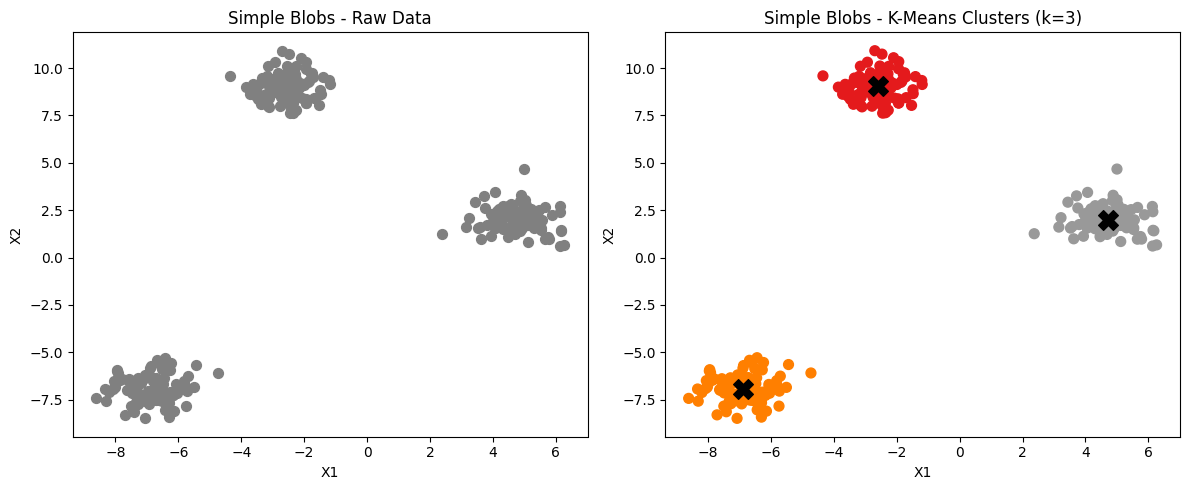

In [134]:
# Simple Blobs
plot_kmeans_clusters(X_simple, k=3, dataset_name="Simple Blobs")

# Clusters Complex Moons

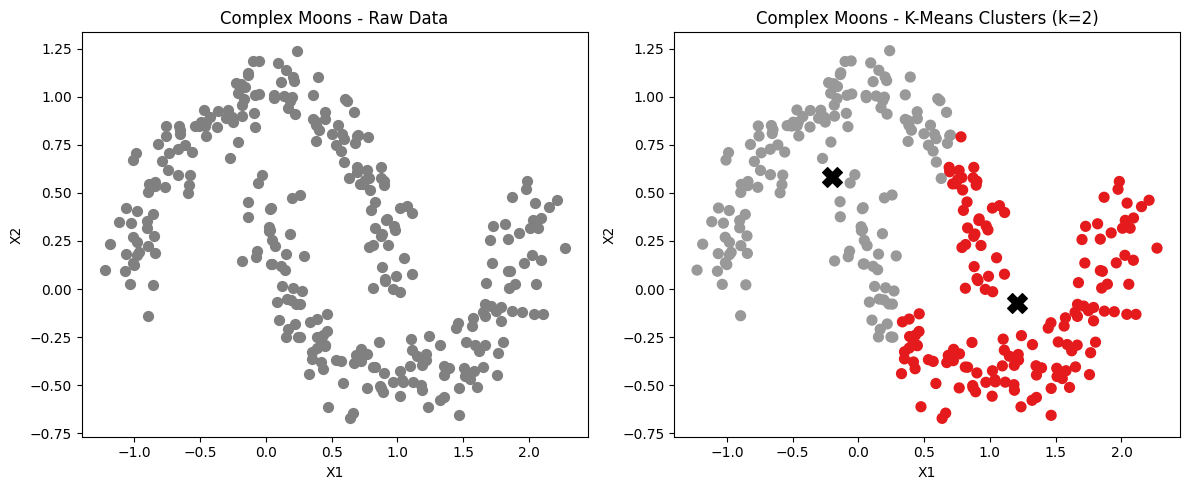

In [135]:
plot_kmeans_clusters(X_complex, k=2, dataset_name="Complex Moons") # Silhouette score

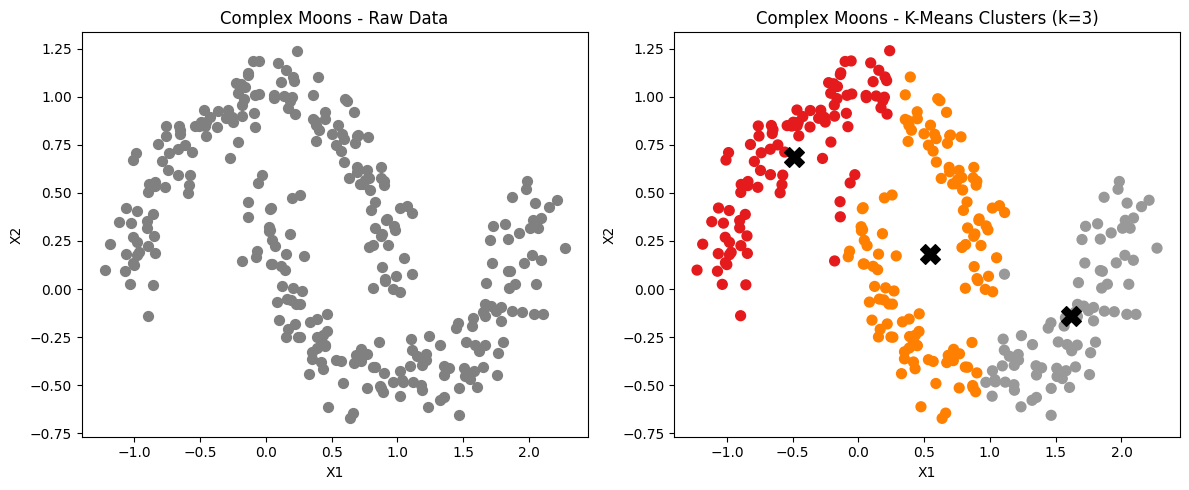

In [136]:
plot_kmeans_clusters(X_complex, k=3, dataset_name="Complex Moons") # Elbow Method

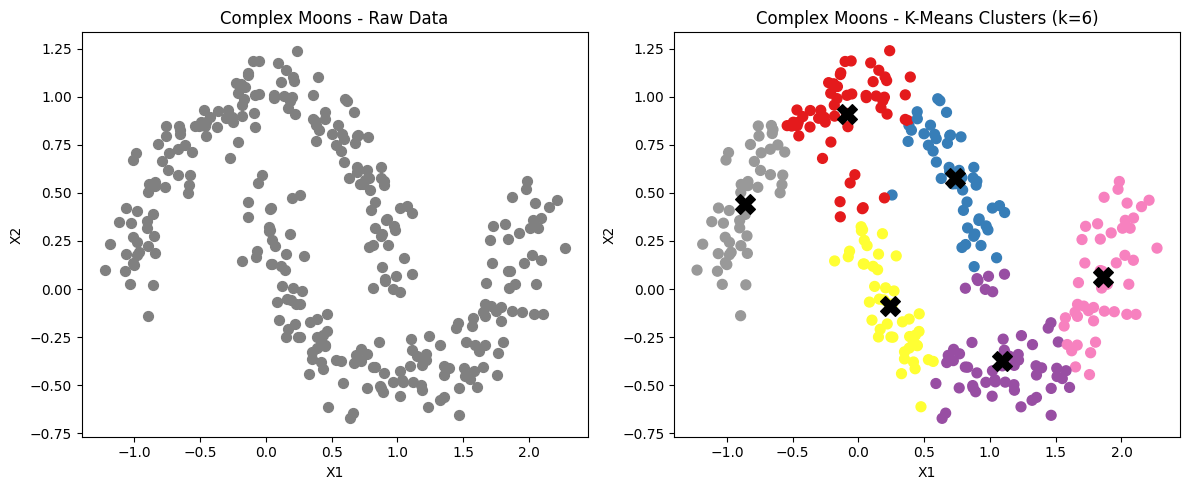

In [ ]:
plot_kmeans_clusters(X_complex, k=6, dataset_name="Complex Moons") # Gap Statitics and Silhouette score

# Silhouette Plots Simple Blobs

In [138]:
def silhouette_plot(X, k, dataset_name):
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    # Compute silhouette scores for each point
    sample_silhouette_values = silhouette_samples(X, labels)
    avg_score = silhouette_score(X, labels)

    print(f"{dataset_name} - k={k} -> Average Silhouette Score: {avg_score:.3f}")

    # Plot
    y_lower = 10
    plt.figure(figsize=(8,6))

    for i in range(k):
        # Scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label for cluster
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for spacing between clusters

    plt.axvline(x=avg_score, color="red", linestyle="--", label="Average Silhouette")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.title(f"Silhouette Plot for {dataset_name} (k={k})")
    plt.legend()
    plt.show()



Simple Blobs - k=3 -> Average Silhouette Score: 0.893


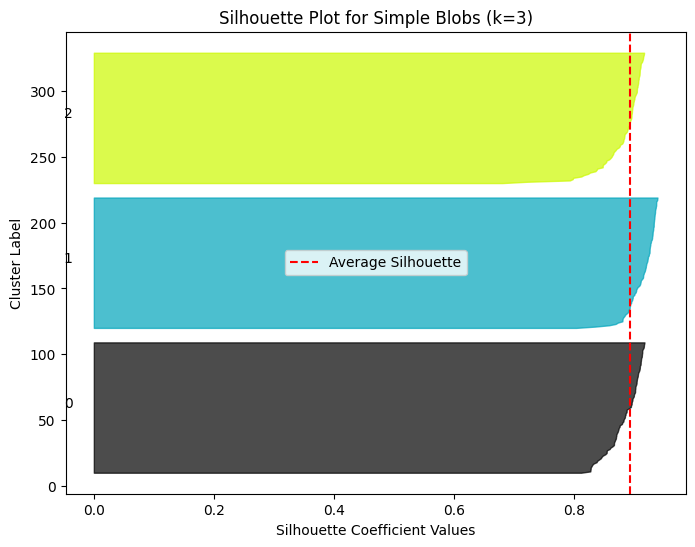

In [139]:
# Simple Blobs
silhouette_plot(X_simple, k=3, dataset_name="Simple Blobs")


# Silhouette Plots Complex Moons

Complex Moons - k=2 -> Average Silhouette Score: 0.479


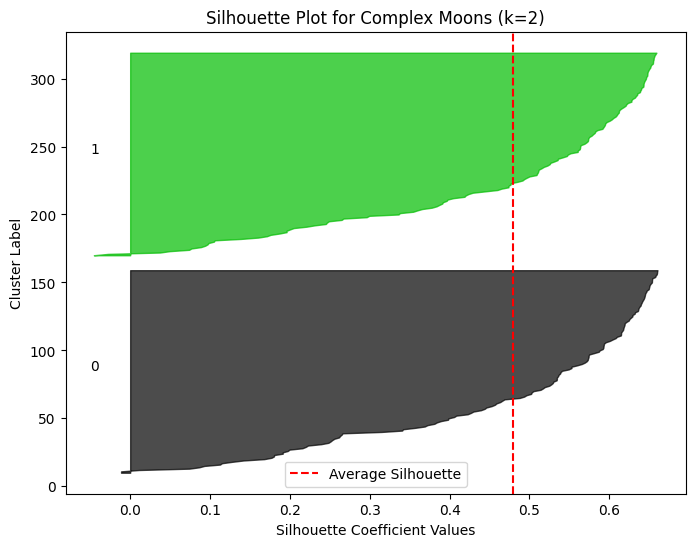

In [140]:
# Complex Moons
silhouette_plot(X_complex, k=2, dataset_name="Complex Moons")

Complex Moons - k=6 -> Average Silhouette Score: 0.477


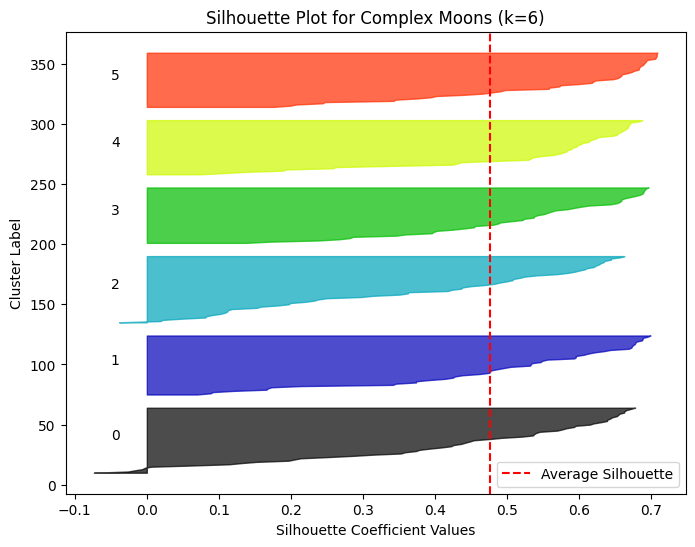

In [141]:
# Complex Moons
silhouette_plot(X_complex, k=6, dataset_name="Complex Moons")

# The 3 Evaluation Metrics Simple Blobs

In [142]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_simple)
centroids = kmeans.cluster_centers_
print("Simple Blobs Pairwise distances between cluster centroids:")
for i in range(k):
    for j in range(i+1, k):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        print(f"Distance between cluster {i} and {j}: {dist:.3f}")

sil_score = silhouette_score(X_simple, labels)
print(f"\nAverage Silhouette Score: {sil_score:.3f}")

db_index = davies_bouldin_score(X_simple, labels)
print(f"Davies-Bouldin Index: {db_index:.3f} (lower is better)")

global_mean = X_simple.mean(axis=0)
bcss = sum([len(X_simple[labels == i]) * np.linalg.norm(centroids[i] - global_mean)**2 for i in range(k)])
print(f"Between-Cluster Sum of Squares (BCSS): {bcss:.3f}")

Simple Blobs Pairwise distances between cluster centroids:
Distance between cluster 0 and 1: 16.552
Distance between cluster 0 and 2: 10.146
Distance between cluster 1 and 2: 14.651

Average Silhouette Score: 0.893
Davies-Bouldin Index: 0.149 (lower is better)
Between-Cluster Sum of Squares (BCSS): 19719.000


In [143]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_simple)
centroids = kmeans.cluster_centers_
print("Simple Blobs Pairwise distances between cluster centroids:")
for i in range(k):
    for j in range(i+1, k):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        print(f"Distance between cluster {i} and {j}: {dist:.3f}")

sil_score = silhouette_score(X_simple, labels)
print(f"\nAverage Silhouette Score: {sil_score:.3f}")

db_index = davies_bouldin_score(X_simple, labels)
print(f"Davies-Bouldin Index: {db_index:.3f} (lower is better)")

global_mean = X_simple.mean(axis=0)
bcss = sum([len(X_simple[labels == i]) * np.linalg.norm(centroids[i] - global_mean)**2 for i in range(k)])
print(f"Between-Cluster Sum of Squares (BCSS): {bcss:.3f}")

Simple Blobs Pairwise distances between cluster centroids:
Distance between cluster 0 and 1: 14.912
Distance between cluster 0 and 2: 10.720
Distance between cluster 0 and 3: 1.170
Distance between cluster 1 and 2: 16.552
Distance between cluster 1 and 3: 14.419
Distance between cluster 2 and 3: 9.598

Average Silhouette Score: 0.708
Davies-Bouldin Index: 0.628 (lower is better)
Between-Cluster Sum of Squares (BCSS): 19753.236


$K=4$ shows bad evaluation values
****

# The 3 Metrics Complex Moons

In [144]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_complex)
centroids = kmeans.cluster_centers_

print("Complex Moons - Pairwise distances between cluster centroids:")
for i in range(k):
    for j in range(i+1, k):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        print(f"Distance between cluster {i} and {j}: {dist:.3f}")

sil_score = silhouette_score(X_complex, labels)
print(f"Average Silhouette Score: {sil_score:.3f}")

db_index = davies_bouldin_score(X_complex, labels)
print(f"Davies-Bouldin Index: {db_index:.3f} (lower is better)")

global_mean = X_complex.mean(axis=0)
bcss = sum([len(X_complex[labels == i]) * np.linalg.norm(centroids[i] - global_mean)**2 for i in range(k)])
print(f"Between-Cluster Sum of Squares (BCSS): {bcss:.3f}")

Complex Moons - Pairwise distances between cluster centroids:
Distance between cluster 0 and 1: 1.550
Average Silhouette Score: 0.479
Davies-Bouldin Index: 0.784 (lower is better)
Between-Cluster Sum of Squares (BCSS): 180.269


In [145]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_complex)
centroids = kmeans.cluster_centers_

print("Complex Moons - Pairwise distances between cluster centroids:")
for i in range(k):
    for j in range(i+1, k):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        print(f"Distance between cluster {i} and {j}: {dist:.3f}")

sil_score = silhouette_score(X_complex, labels)
print(f"Average Silhouette Score: {sil_score:.3f}")

db_index = davies_bouldin_score(X_complex, labels)
print(f"Davies-Bouldin Index: {db_index:.3f} (lower is better)")

global_mean = X_complex.mean(axis=0)
bcss = sum([len(X_complex[labels == i]) * np.linalg.norm(centroids[i] - global_mean)**2 for i in range(k)])
print(f"Between-Cluster Sum of Squares (BCSS): {bcss:.3f}")

Complex Moons - Pairwise distances between cluster centroids:
Distance between cluster 0 and 1: 1.147
Distance between cluster 0 and 2: 2.259
Distance between cluster 1 and 2: 1.119
Average Silhouette Score: 0.425
Davies-Bouldin Index: 0.873 (lower is better)
Between-Cluster Sum of Squares (BCSS): 223.152


In [146]:
k = 6
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_complex)
centroids = kmeans.cluster_centers_

print("Complex Moons - Pairwise distances between cluster centroids:")
for i in range(k):
    for j in range(i+1, k):
        dist = np.linalg.norm(centroids[i] - centroids[j])
        print(f"Distance between cluster {i} and {j}: {dist:.3f}")

sil_score = silhouette_score(X_complex, labels)
print(f"Average Silhouette Score: {sil_score:.3f}")

db_index = davies_bouldin_score(X_complex, labels)
print(f"Davies-Bouldin Index: {db_index:.3f} (lower is better)")

global_mean = X_complex.mean(axis=0)
bcss = sum([len(X_complex[labels == i]) * np.linalg.norm(centroids[i] - global_mean)**2 for i in range(k)])
print(f"Between-Cluster Sum of Squares (BCSS): {bcss:.3f}")

Complex Moons - Pairwise distances between cluster centroids:
Distance between cluster 0 and 1: 0.885
Distance between cluster 0 and 2: 1.744
Distance between cluster 0 and 3: 1.049
Distance between cluster 0 and 4: 2.125
Distance between cluster 0 and 5: 0.908
Distance between cluster 1 and 2: 1.019
Distance between cluster 1 and 3: 0.834
Distance between cluster 1 and 4: 1.240
Distance between cluster 1 and 5: 1.606
Distance between cluster 2 and 3: 0.904
Distance between cluster 2 and 4: 0.882
Distance between cluster 2 and 5: 2.122
Distance between cluster 3 and 4: 1.632
Distance between cluster 3 and 5: 1.223
Distance between cluster 4 and 5: 2.753
Average Silhouette Score: 0.477
Davies-Bouldin Index: 0.651 (lower is better)
Between-Cluster Sum of Squares (BCSS): 275.590


They show varying values
****